In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from horseshoe_gibbs_torch.fast_mvg import (
    FastMultivariateGaussianMixtureBCM,
    FastMultivariateGaussianMixtureRue,
)

torch.manual_seed(0)
n, p = 100, 3
X = torch.randn(n, p)
true_theta = torch.tensor([1.0, -2.0, 0.5])
sigma2 = torch.tensor(0.5)
y = X @ true_theta + torch.randn(n) * sigma2.sqrt()
D_diag = torch.ones(p) * 2.0

A = X.T @ X + torch.diag(1.0 / D_diag)
cov = sigma2 * torch.linalg.inv(A)
mu = torch.linalg.solve(A, X.T @ y)

fast_sampler_bcm = FastMultivariateGaussianMixtureBCM(X, y, D_diag, sigma2)
fast_sampler_rue = FastMultivariateGaussianMixtureRue(X.T @ X, X.T @ y, D_diag, sigma2)
mvn = torch.distributions.MultivariateNormal(mu, covariance_matrix=cov)

M = 5000
samples_fast = fast_sampler_bcm.sample((M,))
samples_fast_rue = fast_sampler_rue.sample((M,))
samples_mvn = mvn.sample((M,))

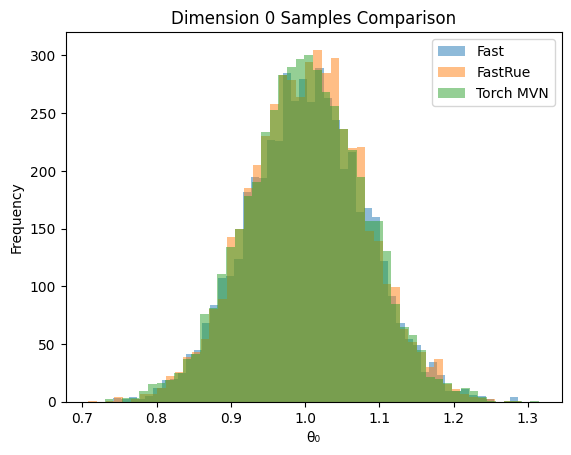

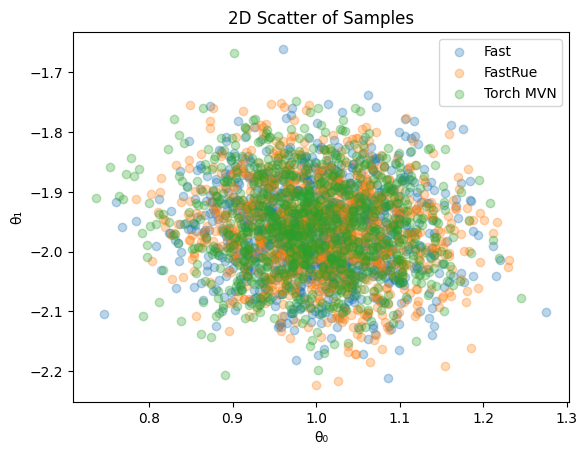

In [2]:
plt.figure()
plt.hist(samples_fast[:, 0].cpu().numpy(), bins=50, alpha=0.5, label='Fast')
plt.hist(samples_fast_rue[:, 0].cpu().numpy(), bins=50, alpha=0.5, label='FastRue')
plt.hist(samples_mvn[:, 0].cpu().numpy(), bins=50, alpha=0.5, label='Torch MVN')
plt.legend()
plt.xlabel('θ₀')
plt.ylabel('Frequency')
plt.title('Dimension 0 Samples Comparison')
plt.show()

plt.figure()
idx = np.random.choice(M, size=1000, replace=False)
plt.scatter(samples_fast[idx, 0].cpu().numpy(), samples_fast[idx, 1].cpu().numpy(), alpha=0.3, label='Fast')
plt.scatter(samples_fast_rue[idx, 0].cpu().numpy(), samples_fast_rue[idx, 1].cpu().numpy(), alpha=0.3, label='FastRue')
plt.scatter(samples_mvn[idx, 0].cpu().numpy(), samples_mvn[idx, 1].cpu().numpy(), alpha=0.3, label='Torch MVN')
plt.legend()
plt.xlabel('θ₀')
plt.ylabel('θ₁')
plt.title('2D Scatter of Samples')
plt.show()